# EXPLORATORY DATA ANALYSIS
Selecionando features e determinando tratamento dos dados.

In [16]:
import pandas as pd

url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2025/INFLUD25-22-12-2025.csv"
df = pd.read_csv(url, sep=';', encoding='latin1')




/tmp/ipython-input-1689590598.py:5: DtypeWarning: Columns (14,92,94,185,186,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';', encoding='latin1')


In [17]:
df.head()


,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,...,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,VG_CODEST,REINF
0,31735451969802,2024-12-29,1,2024-12-29,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,31735516593521,2024-12-29,1,2024-12-29,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,31735544021940,2024-12-29,1,2024-12-29,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,SAO JOSE DO RIO PRETO,354980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,31735559043222,2024-12-30,1,2024-12-29,1,AC,REGIONAL DO BAIXO ACRE,1938.0,RIO BRANCO,120040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,31735560267779,2024-12-30,1,2024-12-29,1,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323477 entries, 0 to 323476
Columns: 194 entries, NU_NOTIFIC to REINF
dtypes: float64(103), int64(14), object(77)
memory usage: 478.8+ MB


In [19]:
df.columns

Index(['NU_NOTIFIC', 'DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI',
       'SG_UF_NOT', 'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       ...
       'VG_OMS', 'VG_OMSOUT', 'VG_LIN', 'VG_MET', 'VG_METOUT', 'VG_DTRES',
       'VG_ENC', 'VG_REINF', 'VG_CODEST', 'REINF'],
      dtype='object', length=194)

In [20]:
df.dtypes

,0
NU_NOTIFIC,int64
DT_NOTIFIC,object
SEM_NOT,int64
DT_SIN_PRI,object
SEM_PRI,int64
...,...
VG_DTRES,object
VG_ENC,float64
VG_REINF,float64
VG_CODEST,float64


## Features nulas

*   30 a 50% -> avaliar
*   \>50% -> descartar

OBS: algumas colunas tem NULL como um valor importante



```
AN_ADENO, 1-marcado pelo usuário Vazio - não marcado
AN_OUTRO, 1-marcado pelo usuário Vazio - não marcado
AN_PARA1, 1-marcado pelo usuário Vazio - não marcado
AN_PARA2, 1-marcado pelo usuário Vazio - não marcado
AN_PARA3, 1-marcado pelo usuário Vazio - não marcado
AN_SARS2, 1-marcado pelo usuário Vazio - não marcado
AN_VSR,   1-marcado pelo usuário Vazio - não marcado
```


```
PCR_ SARS2, 1-marcado pelo usuário Vazio - não marcado
PCR_ADENO,  1-marcado pelo usuário Vazio - não marcado
PCR_BOCA,   1-marcado pelo usuário Vazio - não marcado
PCR_METAP,  1-marcado pelo usuário Vazio - não marcado
PCR_OUTRO,  1-marcado pelo usuário Vazio - não marcado
PCR_PARA1,  1-marcado pelo usuário Vazio - não marcado
PCR_PARA2,  1-marcado pelo usuário Vazio - não marcado
PCR_PARA3,  1-marcado pelo usuário Vazio - não marcado
PCR_PARA4,  1-marcado pelo usuário Vazio - não marcado
PCR_RINO,   1-marcado pelo usuário Vazio - não marcado
PCR_VSR,    1-marcado pelo usuário Vazio - não marcado
```


In [21]:
num_cols_50 = (df.isna().mean() > 0.5).sum()
num_cols_50

np.int64(117)

In [22]:
null_AN = ["AN_ADENO",
"AN_OUTRO",
"AN_PARA1",
"AN_PARA2",
"AN_PARA3",
"AN_SARS2",
"AN_VSR"]



null_PCR = ["PCR_SARS2",
"PCR_ADENO",
"PCR_BOCA",
"PCR_METAP",
"PCR_OUTRO",
"PCR_PARA1",
"PCR_PARA2",
"PCR_PARA3",
"PCR_PARA4",
"PCR_RINO",
"PCR_VSR"]

df[null_AN] = df[null_AN].fillna(0).astype(int)
df[null_PCR] = df[null_PCR].fillna(0).astype(int)


In [23]:
num_cols_50 = (df.isna().mean() > 0.5).sum()
num_cols_50

np.int64(99)

Ou seja, teremos 99 features descartadas e 95 não descartadas.

In [24]:
null_pct = df.isna().mean() * 100
null_pct

,0
NU_NOTIFIC,0.000000
DT_NOTIFIC,0.000000
SEM_NOT,0.000000
DT_SIN_PRI,0.000000
SEM_PRI,0.000000
...,...
VG_DTRES,99.476624
VG_ENC,99.338747
VG_REINF,100.000000
VG_CODEST,99.137187


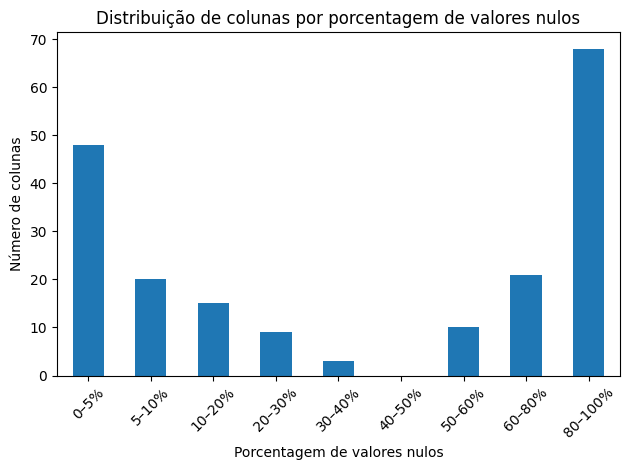

In [25]:
import matplotlib.pyplot as plt

# definir faixas de porcentagem
bins = [0, 5, 10, 20, 30, 40, 50, 60, 80, 100]
labels = [
    '0–5%', '5–10%', '10–20%', '20–30%', '30–40%',
    '40–50%', '50–60%', '60–80%', '80–100%'
]

# categorizar colunas nas faixas
null_bins = pd.cut(null_pct, bins=bins, labels=labels, include_lowest=True)

# contar quantas colunas em cada faixa
bin_counts = null_bins.value_counts().sort_index()

# plot
plt.figure()
bin_counts.plot(kind='bar')
plt.xlabel('Porcentagem de valores nulos')
plt.ylabel('Número de colunas')
plt.title('Distribuição de colunas por porcentagem de valores nulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
cols_to_drop = null_pct[null_pct > 50].index

df = df.drop(columns=cols_to_drop)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323477 entries, 0 to 323476
Data columns (total 95 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NU_NOTIFIC  323477 non-null  int64  
 1   DT_NOTIFIC  323477 non-null  object 
 2   SEM_NOT     323477 non-null  int64  
 3   DT_SIN_PRI  323477 non-null  object 
 4   SEM_PRI     323477 non-null  int64  
 5   SG_UF_NOT   323477 non-null  object 
 6   ID_REGIONA  282434 non-null  object 
 7   CO_REGIONA  282434 non-null  float64
 8   ID_MUNICIP  323477 non-null  object 
 9   CO_MUN_NOT  323477 non-null  int64  
 10  CS_SEXO     323477 non-null  object 
 11  DT_NASC     323409 non-null  object 
 12  NU_IDADE_N  323477 non-null  int64  
 13  TP_IDADE    323477 non-null  int64  
 14  COD_IDADE   323477 non-null  object 
 15  CS_GESTANT  323477 non-null  int64  
 16  CS_RACA     323477 non-null  int64  
 17  CS_ESCOL_N  208590 non-null  float64
 18  ID_PAIS     323477 non-null  object 
 19  CO

In [28]:
dic_path = "/content/dicionario_var.csv"
dic = pd.read_csv(dic_path)

df.columns = df.columns.str.strip().str.upper()
dic['var'] = dic['var'].str.strip().str.upper()

mapping = pd.DataFrame({'var': df.columns})

mapping = mapping.merge(
    dic,
    on='var',
    how='left'
)

pd.set_option('display.max_rows', None)
mapping



,var,Assunto,Ordem_campo_ficha,nome,categoria,descricao
0,NU_NOTIFIC,NaN,0.0,Nº,NaN,Número do registro
1,DT_NOTIFIC,NaN,1.0,Data do preenchimento da ficha de notificação,NaN,Data de preenchimento da ficha de notificação.
2,SEM_NOT,NaN,1.1,Semana Epidemiológica do preenchimento da fich...,NaN,Semana Epidemiológica do preenchimento da fich...
3,DT_SIN_PRI,NaN,2.0,Data de 1ºs sintomas,NaN,Data de 1º sintomas do caso
4,SEM_PRI,NaN,2.1,Semana Epidemiológica dos Primeiros Sintomas,NaN,Semana Epidemiológica do início dos sintomas.
5,SG_UF_NOT,Localização,3.0,UF,NaN,Tabela com código e siglas das UF padronizados...
6,ID_REGIONA,Localização,4.1,Regional de Saúde de Notificação Código (IBGE),NaN,Regional de Saúde onde está localizado o Munic...
7,CO_REGIONA,Localização,4.1,Regional de Saúde de Notificação Código (IBGE),NaN,Regional de Saúde onde está localizado o Munic...
8,ID_MUNICIP,Localização,4.0,Município Código (IBGE),NaN,Município onde está localizada a Unidade que r...
9,CO_MUN_NOT,Localização,4.0,Município Código (IBGE),NaN,Município onde está localizada a Unidade que r...


In [29]:
pd.reset_option('display.max_rows')

df["DT_NASC"].isna().mean()

np.float64(0.000210215873153269)

## COLUNAS PARA REMOVER

*   **NU_NOTIFIC**: id
* **DT_SIN_PRI**: data de primeiros sintomas é incerta e não agrega à análise populacional
* **SEM_PRI**: data de primeiros sintomas irrelevante
*   **ID_REGIONA**: id
* **CO_REGIONA**: código
* **ID_MUNICIP**: id
* **CO_MUN_NOT**: código
* **NU_IDADE_N**: dado sociodemográfico não será utilizado
* **TP_IDADE**: tipo idade
* **COD_IDADE**: código idade
* **CS_GESTANT**: dado sociodemográfico muito específico
* **CS_SEXO**: dado sociodemográfico irrelevante para o relatório
* **CS_RACA**: dado sociodemográfico irrelevante para o relatório
* **CS_ESCOL_N**: dado sociodemográfico irrelevante para o relatório
* **ID_PAIS**: id
* **CO_PAIS**: código
* **SG_UF**: importante onde o paciente está doente, não onde ele mora
* **ID_RG_RESI**: id
* **CO_RG_RESI**: código
* **ID_MN_RESI**: id
* **CO_MUN_RES**: código
* **CS_ZONA**: moradia irrelevante
* **NOSOCOMIAL**: menos de 1.5% dos casos e há mais preenchimento ignorado do que positivo
* **AVE_SUINO**: dado clínico, irrelevante
* **FEBRE**: dado clínico, irrelevante
* **TOSSE**: dado clínico, irrelevante
* **GARGANTA**: dado clínico, irrelevante
* **DISPNEIA**: dado clínico, irrelevante
* **DESC_RESP**: dado clínico, irrelevante
* **SATURACAO**: dado clínico, irrelevante
* **DIARREIA**: dado clínico, irrelevante
* **VOMITO**: dado clínico, irrelevante
* **OUTRO_SIN**: dado clínico, irrelevante
* **ANTIVIRAL**: dado clínico, irrelevante
* **TRAT_COV**: dado clínico, irrelevante (antiviral e não vacina)
* **SG_UF_INTE**: não é relevante para o relatório
* **HOSPITAL**: utilizarei UTI
* **ID_RG_INTE**: id
* **CO_RG_INTE**: código
* **ID_MN_INTE**: id
* **CO_MU_INTE**: código
* **SURTO_SG**: não é relevante para o relatório
* **NM_UN_INTE**: localização muito específica
* **SUPORT_VEN**: dado clínico, irrelevante
* **RAIOX_RES**: dado clínico, irrelevante
* **AMOSTRA**: dado clínico, irrelevante
* **DT_COLETA**: dado clínico, irrelevante
* **PCR_RESUL**: dado clínico, irrelevante
* **DT_PCR**: dado clínico, irrelevante
* **PCR_VSR**: dado clínico, irrelevante
* **PCR_PARA1**: dado clínico, irrelevante
* **PCR_PARA2**: dado clínico, irrelevante
* **PCR_PARA3**: dado clínico, irrelevante
* **PCR_PARA4**: dado clínico, irrelevante
* **PCR_ADENO**: dado clínico, irrelevante
* **PCR_METAP**: dado clínico, irrelevante
* **PCR_BOCA**: dado clínico, irrelevante
* **PCR_RINO**: dado clínico, irrelevante
* **PCR_OUTRO**: dado clínico, irrelevante
* **CLASSI_FIN**: dado clínico, irrelevante
* **CRITERIO**: dado clínico, irrelevante
* **DT_ENCERRA**: dado clínico, irrelevante
* **DT_DIGITA**: dado clínico, irrelevante
* **PCR_SARS2**: dado clínico, irrelevante
* **DOR_ABD**: dado clínico, irrelevante
* **FADIGA**: dado clínico, irrelevante
* **PERD_OLFT**: dado clínico, irrelevante
* **PERD_PALA**: dado clínico, irrelevante
* **TOMO_RES**: dado clínico, irrelevante
* **RES_AN**: dado clínico, irrelevante
* **AN_SARS2**: dado clínico, irrelevante
* **AN_VSR**: dado clínico, irrelevante
* **AN_PARA1**: dado clínico, irrelevante
* **AN_PARA2**: dado clínico, irrelevante
* **AN_PARA3**: dado clínico, irrelevante
* **AN_ADENO**: dado clínico, irrelevante
* **AN_OUTRO**: dado clínico, irrelevante
* **POV_CT**: dado sociodemográfico muito específico
* **TEM_CPF**: dado sociodemográfico muito específico
* **ESTRANG**: dado sociodemográfico muito específico
* **FNT_IN_COV**: dado clínico, irrelevante
* **CO_DETEC**: código
* **REINF**: não sei o que é (não tem no dicionário)


In [38]:
cols_drop = ["NU_NOTIFIC", "DT_SIN_PRI", "SEM_NOT", "SEM_PRI", "ID_REGIONA", "CO_REGIONA", "ID_MUNICIP", "CO_MUN_NOT", "NU_IDADE_N", "TP_IDADE", "COD_IDADE", "ID_PAIS",
             "CO_PAIS","SG_UF", "ID_RG_RESI", "CO_RG_RESI", "ID_MN_RESI", "CO_MUN_RES", "CS_SEXO","CS_RACA", "CS_GESTANT", "CS_ESCOL_N", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE",
             "GARGANTA","DISPNEIA","DESC_RESP", "HISTO_VGM", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "ANTIVIRAL", "TRAT_COV", "HOSPITAL", "SG_UF_INTE", "ID_RG_INTE",
             "CO_RG_INTE",
             "CO_MU_INTE", "SURTO_SG","ID_MN_INTE", "NM_UN_INTE", "RAIOX_RES","SUPORT_VEN","AMOSTRA", "TP_AMOSTRA", "DT_COLETA", "PCR_RESUL","DT_PCR","PCR_VSR","PCR_PARA1",
             "PCR_PARA2","PCR_PARA3","PCR_PARA4","PCR_ADENO","PCR_METAP","PCR_BOCA","PCR_RINO","PCR_OUTRO","CLASSI_FIN","CRITERIO","DT_ENCERRA","DT_DIGITA","PCR_SARS2",
             "DOR_ABD","FADIGA","PERD_OLFT","PERD_PALA","TOMO_RES","RES_AN","AN_SARS2","AN_VSR","AN_PARA1","AN_PARA2","AN_PARA3","AN_ADENO","AN_OUTRO","POV_CT","TEM_CPF",
             "ESTRANG","FNT_IN_COV","CO_DETEC","REINF"]

df = df.drop(columns=cols_drop, errors="ignore")

df.columns


Index(['DT_NOTIFIC', 'SG_UF_NOT', 'DT_NASC', 'VACINA', 'DT_INTERNA', 'UTI',
       'EVOLUCAO', 'DT_EVOLUCA', 'VACINA_COV'],
      dtype='object')

## FEATURES BÁSICAS
### taxa de aumento de casos

1.   **DT_NOTIFIC**

Descrição: Data do preenchimento da ficha de notificação (ocorrência do caso)

Type: texto ANO-MÊS-DIA

*OBS: Transformar type em datetime.*

---

### taxa de mortalidade

1.   **EVOLUCAO**

Descrição: Desfecho/evolução do caso

Type: 1-Cura 2-Óbito 3- Óbito por outras causas 9-Ignorado

*OBS: Tratar Óbito (2) como 1 e Cura (1) e Óbito (3) como 0. Tratar Ignorado (9) como null.*

2. **DT_EVOLUCA**

Descrição: Data da alta ou óbito

Type: texto ANO-MÊS-DIA

*OBS: Transformar type em datetime.*

---

### taxa de ocupação de UTI

1.   **UTI**

Descrição: Internado em UTI?

Type: 1-Sim 2-Não 9-Ignorado

*OBS: Padronizar Não como 0 e Sim como 1. Tratar Ignorado (9) como null.*

---

### taxa de vacinação da população
1.   **VACINA**

Descrição: Recebeu vacina contra Gripe na última campanha?

Type: 1-Sim 2-Não 9-Ignorado

*OBS: Padronizar Não como 0 e Sim como 1. Tratar Ignorado (9) como null.*

2.   **VACINA_COV**

Descrição: Recebeu vacina COVID-19?

Type: 1-Sim 2-Não 9-Ignorado

*OBS: Padronizar Não como 0 e Sim como 1. Tratar Ignorado (9) como null.*

## FEATURES PARA CONTEXTUALIZAÇÃO

Essas features são opcionais e é importante estudar se faz sentido adicionar contextualização sociodemográfica no relatório.



1.   **SG_UF_NOT**

Descrição: UF onde foi feita a notificação

Type: texto UF